# Clustering Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## K- Means Clustering

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris2.csv")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


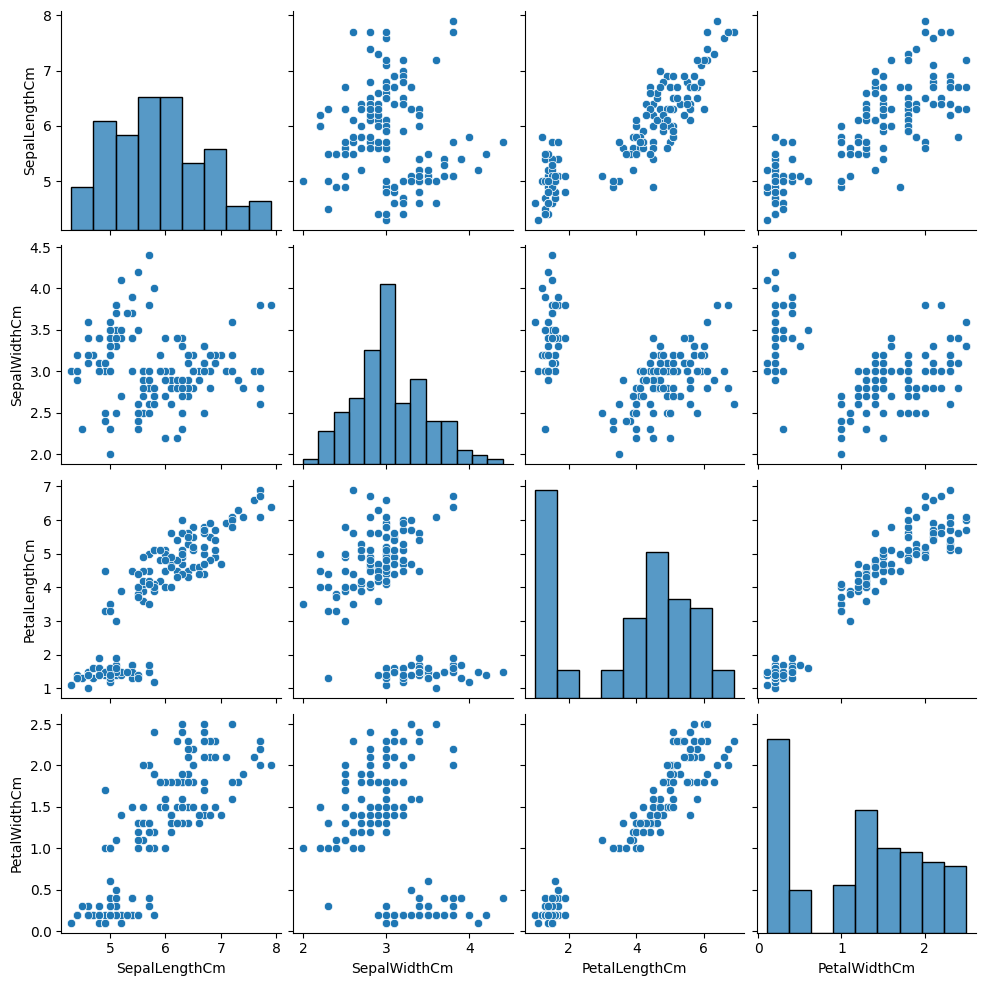

In [3]:
sns.pairplot(data=df)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=8, init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

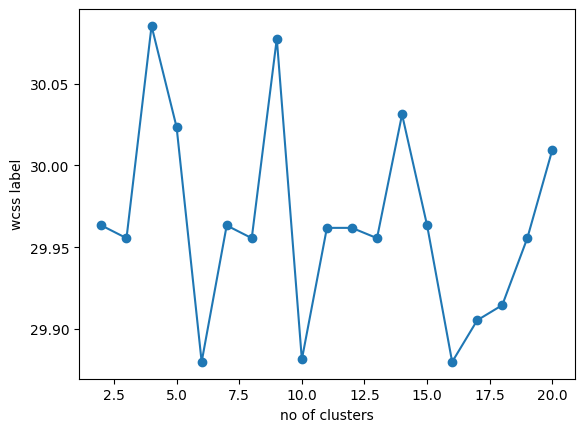

In [11]:
plt.plot([i for i in range(2,21)],wcss, marker= "o")
plt.xticks()
plt.xlabel("no of clusters")
plt.ylabel("wcss label")
plt.show()
         

In [12]:
kmn = KMeans(n_clusters=3)
df["Predict"] = kmn.fit_predict(df)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


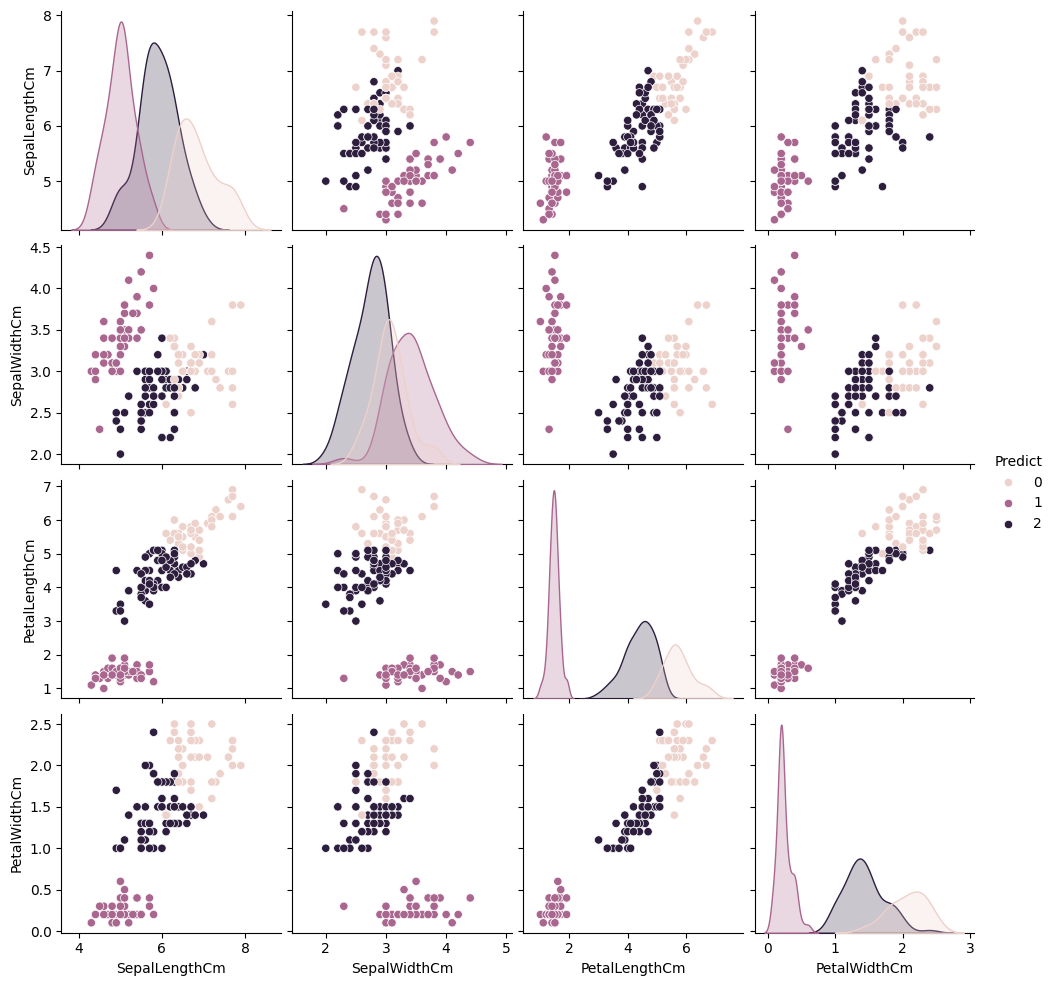

In [15]:
sns.pairplot(data=df, hue= "Predict")
plt.show()

##  Hierarchical Clustering

### Agglomerative Hierarchical Clustering

In [18]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris2.csv")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


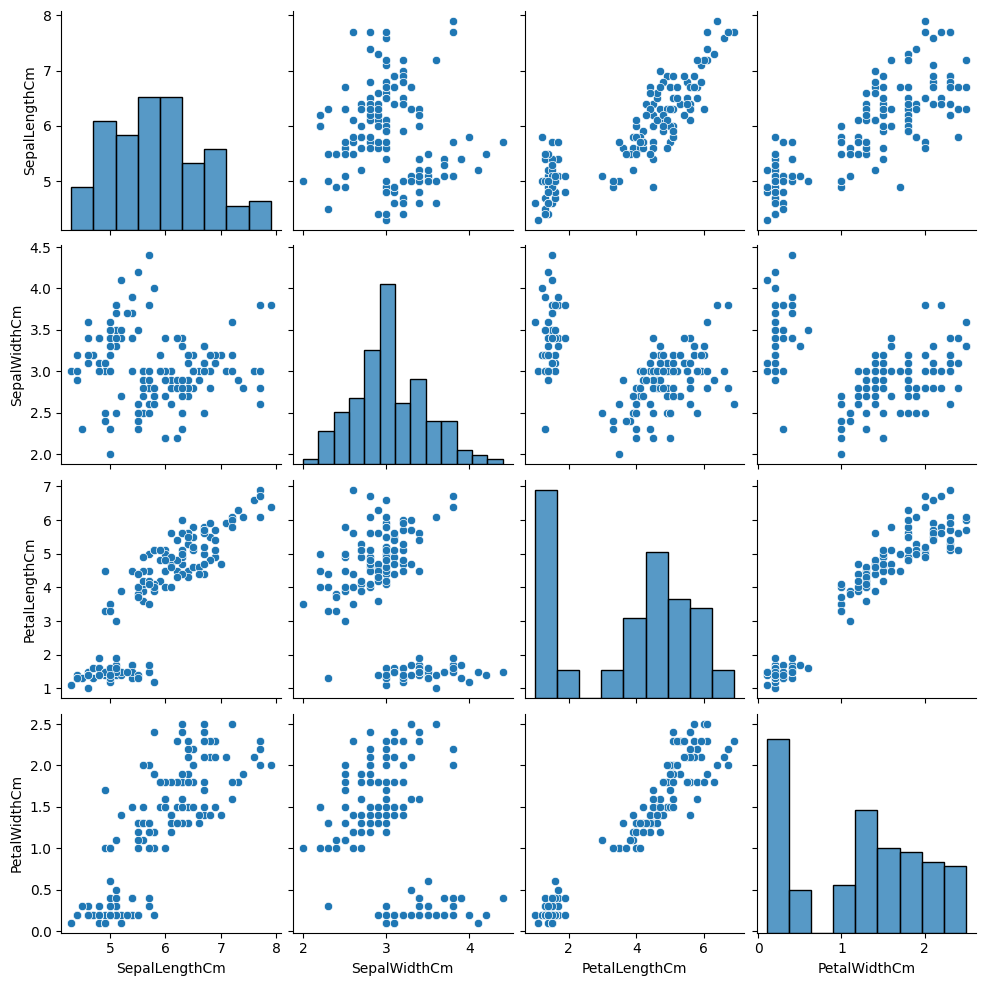

In [19]:
sns.pairplot(data=df)
plt.show()

In [20]:
import scipy.cluster.hierarchy as sc

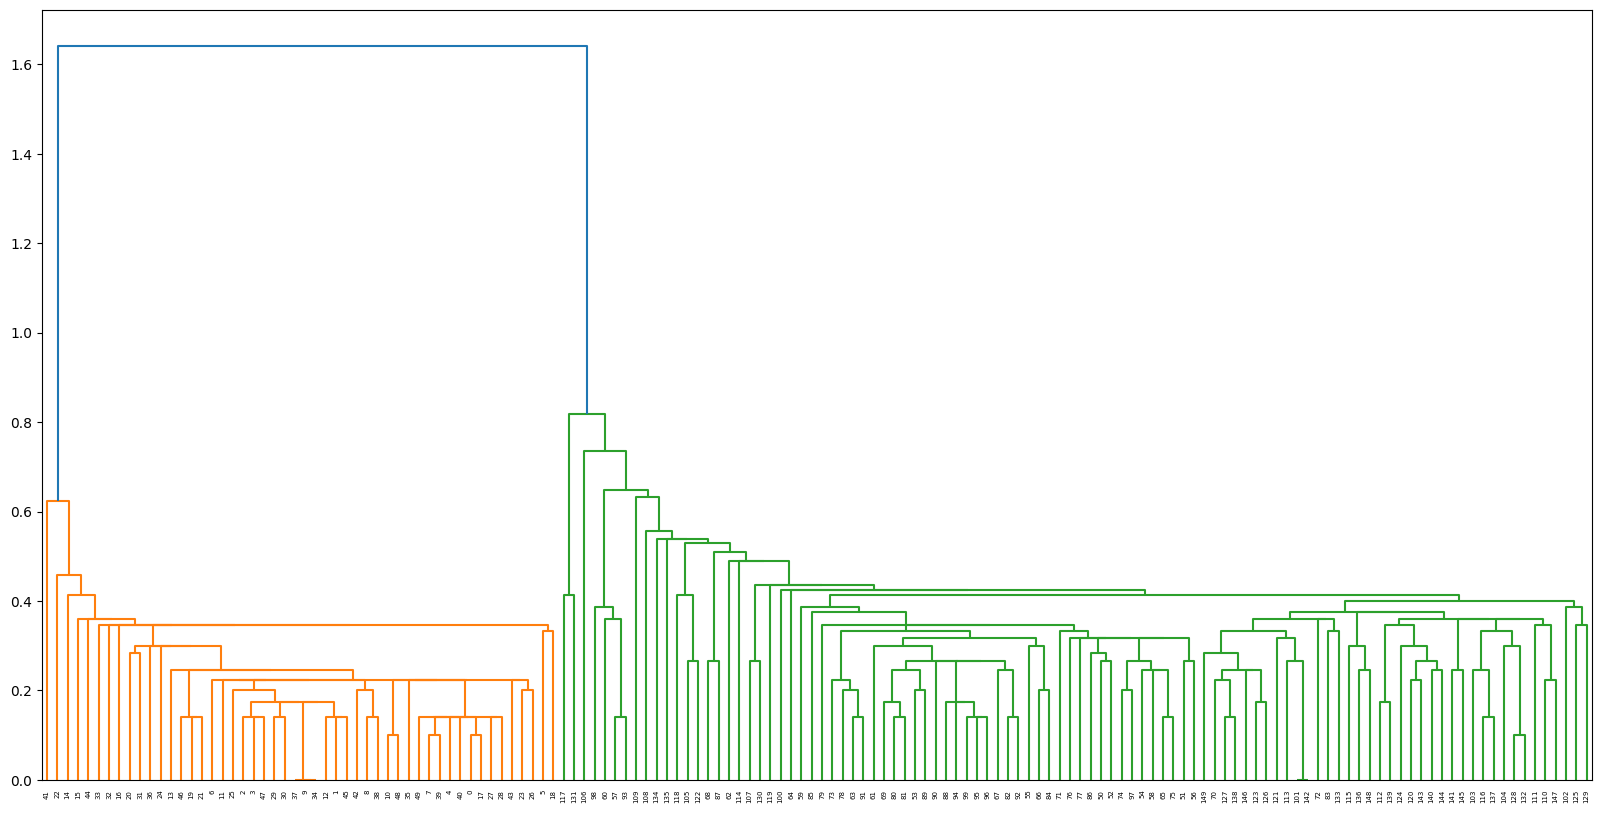

In [23]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(df, method="single",metric="euclidean"))
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
ac = AgglomerativeClustering(n_clusters=2 , linkage="single")
df["predict"] = ac.fit_predict(df)

df.head(5)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


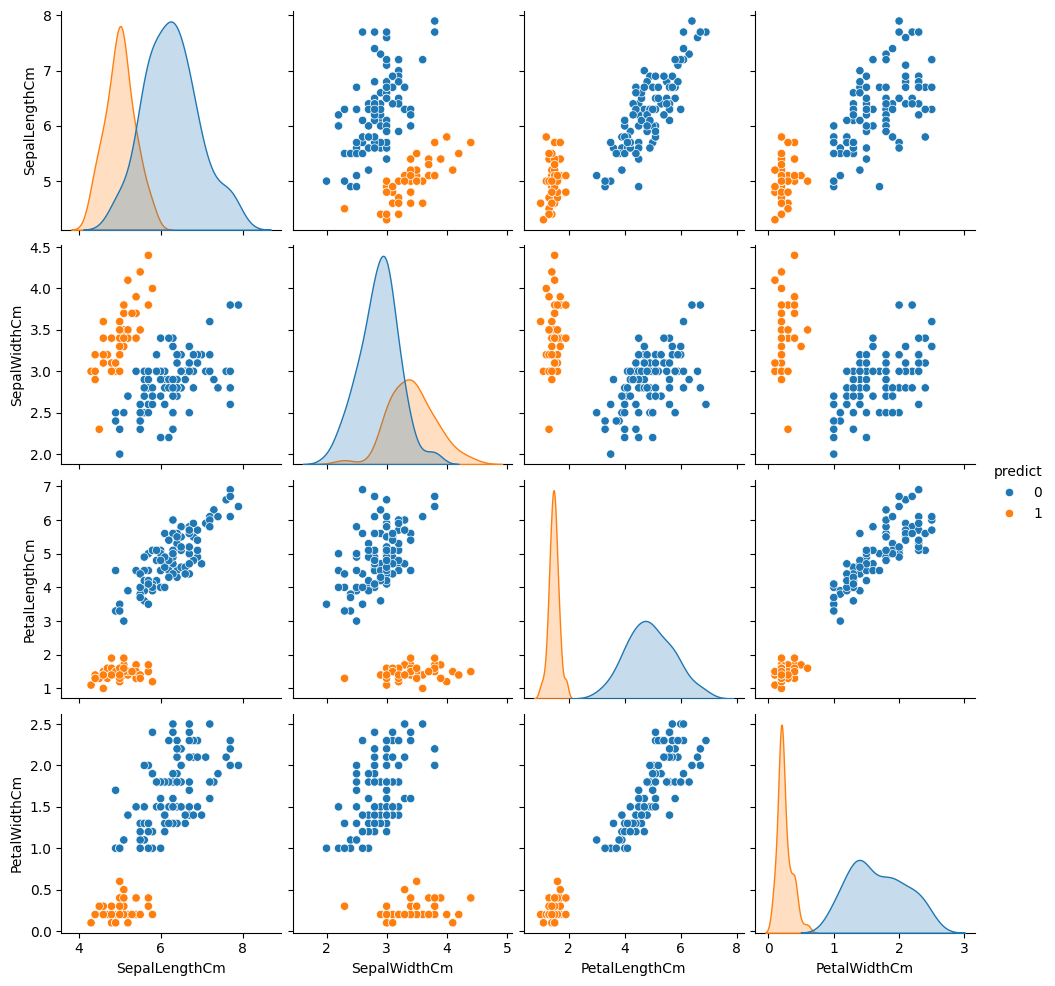

In [27]:
sns.pairplot(data=df , hue="predict")
plt.show()

## DBSCAN Clustering Algorithm

In [28]:
from sklearn.datasets import make_moons

In [29]:
x,y = make_moons(n_samples=250,noise=0.05)

In [37]:
dt = {"data1":x[:,0], "data2":x[:,1]}

In [38]:
dt = pd.DataFrame(dt)

In [39]:
dt.head(4)

,data1,data2
0,1.935424,0.190177
1,-0.280465,0.916170
2,0.409802,0.900092
3,-0.586212,0.745455


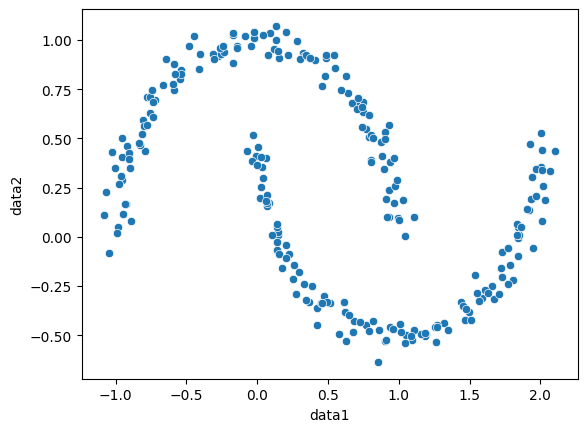

In [40]:
sns.scatterplot(x="data1" , y="data2" , data=dt)
plt.show()

In [41]:
from sklearn.cluster import DBSCAN


In [42]:
db = DBSCAN(eps=0.2,
    min_samples=5,
    metric='euclidean')
dt["predict"] = db.fit_predict(dt)

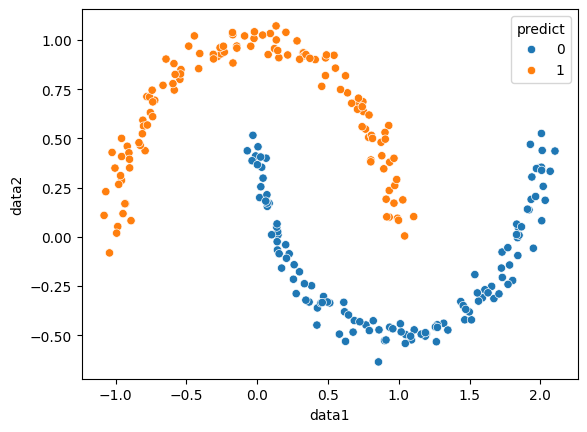

In [44]:
sns.scatterplot(x="data1" , y="data2" ,hue= "predict", data=dt)
plt.show()

### Silhouette Score

In [46]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris2.csv")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [47]:
from sklearn.metrics import silhouette_score

In [48]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [49]:
silhouette_score(df, labels=kmn.labels_)

0.5525919445499757

In [58]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=1)
    km1.fit_predict(df)
    ss.append(silhouette_score(df, labels=kmn.labels_))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

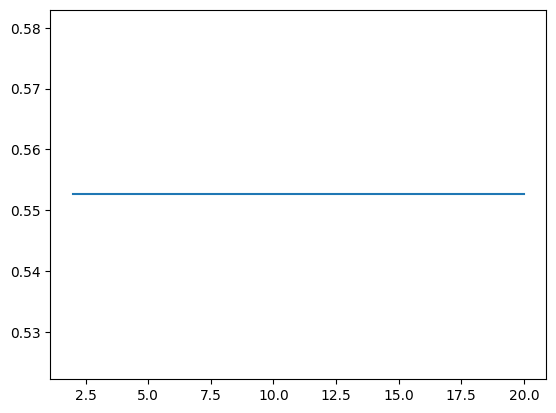

In [59]:
plt.plot(no_c,ss)
plt.xticks()
plt.show()